# Los Angeles Crime

In [53]:
# Import libraries and data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('data/crimes.csv')
print(data.info())
print(data.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185715 entries, 0 to 185714
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   DR_NO         185715 non-null  int64 
 1   Date Rptd     185715 non-null  object
 2   DATE OCC      185715 non-null  object
 3   TIME OCC      185715 non-null  int64 
 4   AREA NAME     185715 non-null  object
 5   Crm Cd Desc   185715 non-null  object
 6   Vict Age      185715 non-null  int64 
 7   Vict Sex      185704 non-null  object
 8   Vict Descent  185705 non-null  object
 9   Weapon Desc   73502 non-null   object
 10  Status Desc   185715 non-null  object
 11  LOCATION      185715 non-null  object
dtypes: int64(3), object(9)
memory usage: 17.0+ MB
None
       DR_NO   Date Rptd    DATE OCC  TIME OCC    AREA NAME  \
0  220314085  2022-07-22  2020-05-12      1110    Southwest   
1  222013040  2022-08-06  2020-06-04      1620      Olympic   
2  220614831  2022-08-18  2020-08-17      

In [54]:
# Data cleaning
data['Date Rptd'] = pd.to_datetime(data['Date Rptd'])
data['DATE OCC'] = pd.to_datetime(data['DATE OCC'])
data.rename(columns={'DR_NO': 'Recordnumber',
                     'Date Rptd': 'DateCrimeReported', 
                     'DATE OCC': 'DateCrimeOccurred', 
                     'Crm Cd Desc': 'CrimeCommitted',
                     'TIME OCC': 'TimeOccurred',
                     'LOCATION': 'Location',
                     'AREA NAME': 'AreaName',
                     'Vict Age': 'VictAge',
                     'Vict Sex': 'VictSex',
                     'Vict Descent': 'VictRace',
                     'Weapon Desc': 'Weapon',
                     'Status Desc': 'Status'}, inplace=True)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185715 entries, 0 to 185714
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Recordnumber       185715 non-null  int64         
 1   DateCrimeReported  185715 non-null  datetime64[ns]
 2   DateCrimeOccurred  185715 non-null  datetime64[ns]
 3   TimeOccurred       185715 non-null  int64         
 4   AreaName           185715 non-null  object        
 5   CrimeCommitted     185715 non-null  object        
 6   VictAge            185715 non-null  int64         
 7   VictSex            185704 non-null  object        
 8   VictRace           185705 non-null  object        
 9   Weapon             73502 non-null   object        
 10  Status             185715 non-null  object        
 11  Location           185715 non-null  object        
dtypes: datetime64[ns](2), int64(3), object(7)
memory usage: 17.0+ MB
None


/home/carlos/.conda/envs/conda_data_analysis/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


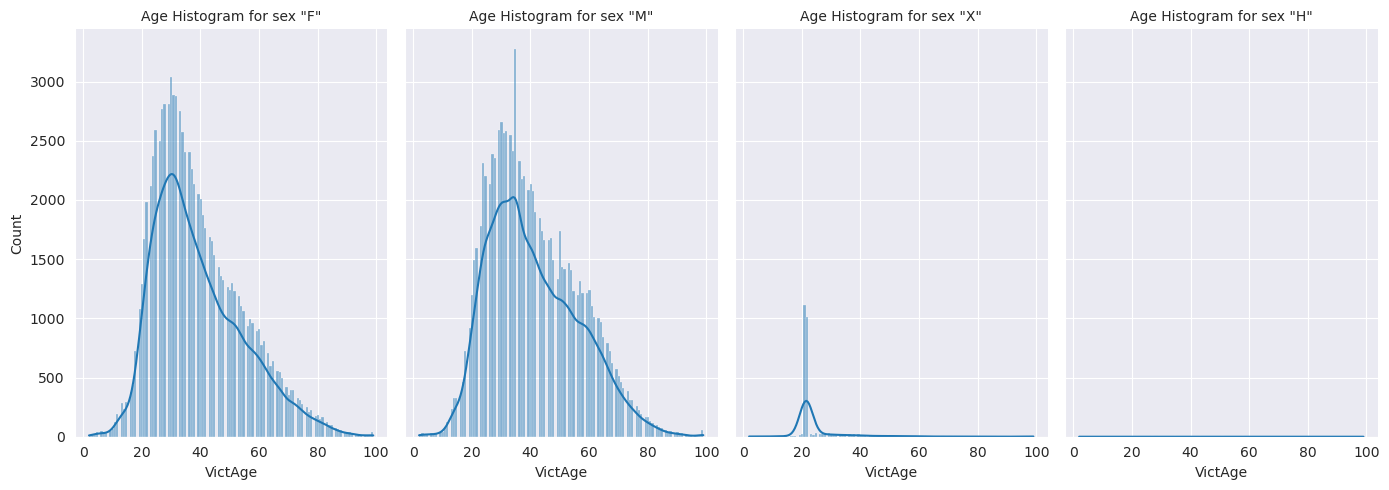

In [57]:
# Data plotting and exploring
h = sns.displot(data=data, x='VictAge', kind='hist', kde=True, col='VictSex', aspect=0.7)
h.set_titles('Age Histogram for sex "{col_name}"')

In [59]:
print(f'{data["AreaName"].nunique()} areas')
print(f'{data["Location"].nunique()} locations')
print(f'{data["VictRace"].nunique()} victim race types')
print(f'{data["CrimeCommitted"].nunique()} crime types')
print(f'{data["Weapon"].nunique()} weapon types')
print(f'{data["Status"].nunique()} possible case status')

21 areas
39286 locations
20 victim race types
104 crime types
74 weapon types
6 possible case status


/home/carlos/.conda/envs/conda_data_analysis/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


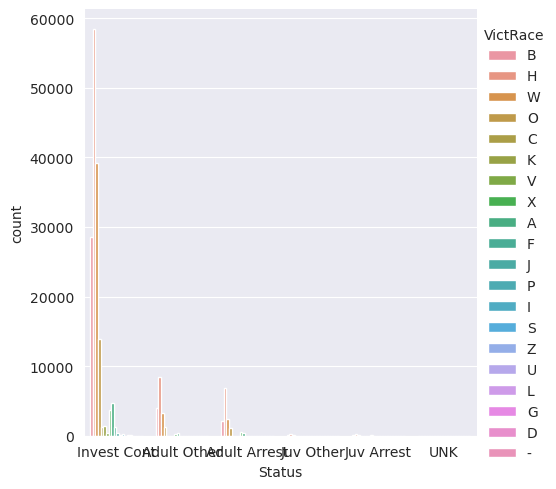

In [71]:
sns.catplot(data=data, x='Status', kind='count', hue='VictRace')